# Modeling using Regression

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1">Modeling</a></span></li></ul></div>

In [65]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
import datetime as dt
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


In [67]:
from tools.tools import read_json, get_current_time

In [68]:
plt.style.use('ggplot')

In [69]:
config = read_json('../config.json')

current_date = get_current_time('yyyymmdd')

wd = f"{config['workspace_directory']}/data"

In [70]:
df = pd.read_csv(f"{wd}/processing/basin_int_viirs_for_modeling.csv")

In [71]:
df.head(3)

,year_month,region,obs_day_cnt_avg,obs_day_cnt_med,obs_day_cnt_sum,obs_day_cnt_min,obs_day_cnt_max,qf_fit_day_avg_avg,qf_fit_day_avg_med,qf_fit_day_avg_sum,...,qf_fit_day_min_min_per_squaremeters,qf_fit_day_min_max_per_squaremeters,qf_fit_day_max_avg_per_squaremeters,qf_fit_day_max_med_per_squaremeters,qf_fit_day_max_sum_per_squaremeters,qf_fit_day_max_min_per_squaremeters,qf_fit_day_max_max_per_squaremeters,month,oil_bbl_d_total_production,year
0,2012-03-01,Anadarko Region,13.041667,12.5,313,3,33,4.786164,4.291667,114.867926,...,0.0,0.0,4.185230e-10,4.505471e-10,1.004455e-08,0.0,7.023235e-10,3,254203.561,2012
1,2012-03-01,Appalachia Region,31.071429,32.0,870,1,86,9.502222,8.966184,266.062205,...,0.0,0.0,1.925259e-10,1.769157e-10,5.390726e-09,0.0,2.757804e-10,3,32000.000,2012
2,2012-03-01,Bakken Region,260.321429,249.0,7289,2,571,1.497039,1.500962,41.917086,...,0.0,0.0,2.919411e-10,3.725575e-10,8.174350e-09,0.0,5.807514e-10,3,595203.806,2012


In [72]:
df['epochtime'] = (pd.to_datetime(df['year_month']) - dt.datetime(1970,1,1)).dt.total_seconds()

In [73]:
X = df.drop(columns=[
    'oil_bbl_d_total_production',
])

X = pd.get_dummies(X)

y = df['oil_bbl_d_total_production']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

## Linear Regression

In [74]:
lr = LinearRegression()
lr.fit(X_train, y_train);

In [75]:
lr.score(X_train, y_train)

0.9379489011864182

In [76]:
lr.score(X_test, y_test)

0.5561272966907718

In [77]:
cross_val_score(lr, X, y, cv=10).mean()

0.7757313837475615

## Random Forest

In [78]:
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train);

In [79]:
rf.score(X_train, y_train)

0.9986047917192388

In [80]:
rf.score(X_test, y_test)

0.9866625145011108

In [81]:
cross_val_score(rf, X, y, cv=10).mean()

0.9331975692853189

In [82]:
important_features = pd.Series(data=rf.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.head(15)

region_Permian Region     0.444083
epochtime                 0.158912
obs_day_cnt_avg           0.134437
obs_day_cnt_med           0.123756
obs_day_cnt_max           0.039441
year                      0.024999
qf_fit_day_avg_avg        0.010927
qf_fit_day_med_med        0.009935
aland                     0.008595
obs_day_cnt_sum           0.008126
qf_fit_day_med_avg        0.005931
qf_fit_day_sum_avg        0.004291
qf_fit_day_sum_med        0.003952
qf_fit_day_med_sum        0.003537
region_Anadarko Region    0.002878
dtype: float64

## Extra Trees

In [83]:
et = ExtraTreesRegressor(random_state=42, n_estimators=500)
et.fit(X_train, y_train);

In [84]:
et.score(X_train, y_train)

1.0

In [85]:
et.score(X_test, y_test)

0.9953180550102854

In [86]:
cross_val_score(et, X, y, cv=10).mean()

0.9569336839015797

In [87]:
important_features = pd.Series(data=et.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.head(15)

region_Permian Region               0.558261
qf_fit_day_med_med                  0.085773
year                                0.044770
obs_day_cnt_sum_per_squaremeters    0.043781
epochtime                           0.039163
qf_fit_day_med_avg                  0.029690
obs_day_cnt_sum                     0.025978
obs_day_cnt_avg                     0.025572
region_Eagle Ford Region            0.023403
obs_day_cnt_med                     0.023244
obs_day_cnt_max                     0.018703
qf_fit_day_med_max                  0.012168
region_Appalachia Region            0.011556
qf_fit_day_med_sum                  0.008634
region_Haynesville Region           0.007579
dtype: float64

# Interpreting 

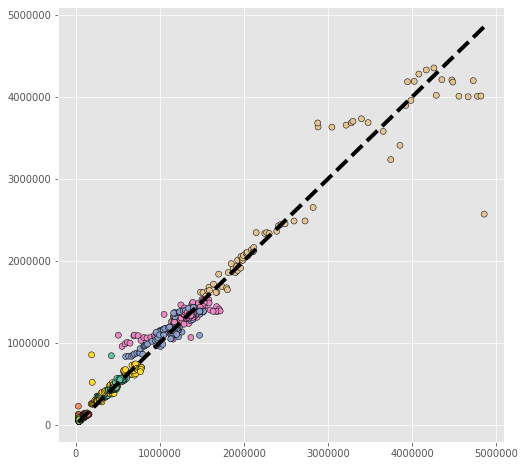

In [88]:
predicted = cross_val_predict(et, X, y, cv=10)

color_labels = df['region'].unique()
# print(color_labels)
# List of RGB triplets
rgb_values = sns.color_palette("Set2", 8)

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots()
plt.scatter(y, predicted, edgecolors=(0, 0, 0), c=df['region'].map(color_map))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
#ax.set_xlabel('Measured')
#ax.set_ylabel('Predicted')
#plt.legend()
plt.show();

In [89]:
resids = y - predicted

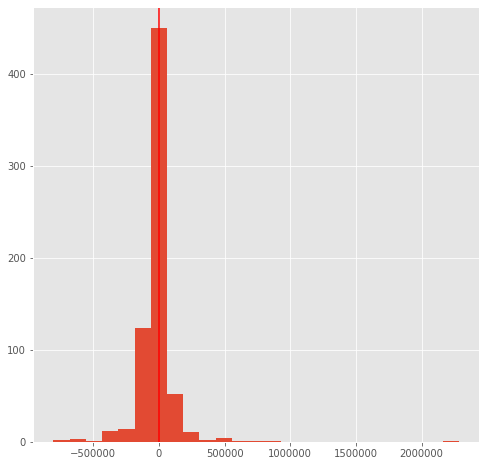

In [90]:
# Normality of residuals assumption
plt.figure(figsize=(8, 8))

plt.hist(resids, bins=25);
plt.axvline(0, color='red')

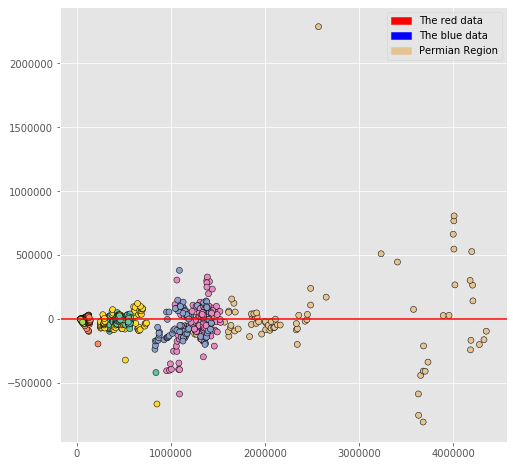

In [91]:
plt.figure(figsize=(8, 8))

plt.scatter(predicted, resids, edgecolors='black', c=df['region'].map(color_map))

#legend_elements = [Patch(facecolor='orange', edgecolor='r', label='Color Patch')]
plt.legend(handles=[
    mpatches.Patch(color='red', label='The red data'),
    mpatches.Patch(color='blue', label='The blue data'),
    mpatches.Patch(color=(0.8980392156862745,0.7686274509803922,0.5803921568627451), label='Permian Region'),
])
plt.axhline(0, color='red');